In [1]:
### SIMULATED_BNS_RATES.IPYNB -- calculate expected astrophysical rates within sensitive volume, given total astrophysical rate estimate

In [2]:
# load packages

import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import sodapop

! python3 -m pip install bilby # only need to run this once
! python3 -m pip install lalsuite # only need to run this once

import bilby
import lal
import lalsimulation as lalsim
import astropy.units as u
from astropy.coordinates import Distance
from astropy.cosmology import Planck15 as cosmo

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [4]:
# user input -- high rate, no sfr scenario

BNS_RATE = 1200. # Gpc^-3 yr^-1, cf. rates in https://arxiv.org/abs/2111.03634

ZMIN = 1e-6
DLMIN = Distance(z=ZMIN, unit=u.Mpc).value
DLMAX_DICT = {'O4': 200., 'O5': 350., '3G': 3000., 'z10': 100000.} # Mpc; 200, 350, 100000 (z=9.5) are reasonable range estimates for O4, O5, 3G; see https://arxiv.org/abs/1304.0670, https://arxiv.org/abs/2109.09882

def SFR(z): # star formation rate as a function of redshift
    
    if np.isscalar(z): z = np.array([z])
    else: z = np.array(z)
    
    return  1.

def DL_PDF(dl,params): # luminosity distance distribution probability density function

  dlmin, dlmax = params
	
  if np.isscalar(dl): dl = np.array([dl])
  else: dl = np.array(dl)
  Z = np.zeros(len(dl))
	
  z = np.array([Distance(d,unit=u.Mpc).compute_z(cosmology=cosmo) for d in dl])
  p = 4.*np.pi*dl**2*SFR(z)/(cosmo.H(z).value*(1.+z)**3) # uniform in comoving volume distribution, with Madau-Dickinson SFR; see https://arxiv.org/abs/1505.05607, https://arxiv.org/abs/1805.10270
	
  return np.where((dl > dlmax) | (dl < dlmin), Z, p) # this enforces the dlmin and dlmax cutoffs

In [5]:
z_grid = np.linspace(ZMIN,Distance(1.,unit=u.Mpc).compute_z(cosmology=cosmo),1000)
norm = 1e9*np.trapz(DL_PDF(Distance(z=z_grid, unit=u.Mpc).value,(DLMIN,DLMAX_DICT['z10'])),z_grid)

In [6]:
z_grid = np.linspace(ZMIN,Distance(DLMAX_DICT['O4'],unit=u.Mpc).compute_z(cosmology=cosmo),1000)
BNS_RATE*np.trapz(DL_PDF(Distance(z=z_grid, unit=u.Mpc).value,(DLMIN,DLMAX_DICT['z10'])),z_grid)/norm

8.180826098007383

In [7]:
z_grid = np.linspace(ZMIN,Distance(DLMAX_DICT['O5'],unit=u.Mpc).compute_z(cosmology=cosmo),1000)
BNS_RATE*np.trapz(DL_PDF(Distance(z=z_grid, unit=u.Mpc).value,(DLMIN,DLMAX_DICT['z10'])),z_grid)/norm

39.25825359479284

In [8]:
z_grid = np.linspace(ZMIN,Distance(DLMAX_DICT['3G'],unit=u.Mpc).compute_z(cosmology=cosmo),1000)
BNS_RATE*np.trapz(DL_PDF(Distance(z=z_grid, unit=u.Mpc).value,(DLMIN,DLMAX_DICT['z10'])),z_grid)/norm

6871.18869862095

In [9]:
# user input -- high rate, sfr scenario

BNS_RATE = 1200. # Gpc^-3 yr^-1, cf. rates in https://arxiv.org/abs/2111.03634

def SFR(z): # star formation rate as a function of redshift
    
    if np.isscalar(z): z = np.array([z])
    else: z = np.array(z)
    
    return (1.+1./2.9**5.6)*(1.+z)**2.7/(1.+((1.+z)/2.9)**5.6) # Madau-Dickinson SFR, up to normalization

def DL_PDF(dl,params): # luminosity distance distribution probability density function

  dlmin, dlmax = params
	
  if np.isscalar(dl): dl = np.array([dl])
  else: dl = np.array(dl)
  Z = np.zeros(len(dl))
	
  z = np.array([Distance(d,unit=u.Mpc).compute_z(cosmology=cosmo) for d in dl])
  p = 4.*np.pi*dl**2*SFR(z)/(cosmo.H(z).value*(1.+z)**3) # uniform in comoving volume distribution, with Madau-Dickinson SFR; see https://arxiv.org/abs/1505.05607, https://arxiv.org/abs/1805.10270
	
  return np.where((dl > dlmax) | (dl < dlmin), Z, p) # this enforces the dlmin and dlmax cutoffs

In [10]:
z_grid = np.linspace(ZMIN,Distance(1.,unit=u.Mpc).compute_z(cosmology=cosmo),1000)
norm = 1e9*np.trapz(DL_PDF(Distance(z=z_grid, unit=u.Mpc).value,(DLMIN,DLMAX_DICT['z10'])),z_grid)

In [11]:
z_grid = np.linspace(ZMIN,Distance(DLMAX_DICT['O4'],unit=u.Mpc).compute_z(cosmology=cosmo),1000)
BNS_RATE*np.trapz(DL_PDF(Distance(z=z_grid, unit=u.Mpc).value,(DLMIN,DLMAX_DICT['z10'])),z_grid)/norm

8.916216236027967

In [12]:
z_grid = np.linspace(ZMIN,Distance(DLMAX_DICT['O5'],unit=u.Mpc).compute_z(cosmology=cosmo),1000)
BNS_RATE*np.trapz(DL_PDF(Distance(z=z_grid, unit=u.Mpc).value,(DLMIN,DLMAX_DICT['z10'])),z_grid)/norm

45.41630673774958

In [13]:
z_grid = np.linspace(ZMIN,Distance(DLMAX_DICT['3G'],unit=u.Mpc).compute_z(cosmology=cosmo),1000)
BNS_RATE*np.trapz(DL_PDF(Distance(z=z_grid, unit=u.Mpc).value,(DLMIN,DLMAX_DICT['z10'])),z_grid)/norm

15878.258109606517

In [14]:
# user input -- realistic rate, no sfr scenario

BNS_RATE = 440. # Gpc^-3 yr^-1, cf. rates in https://arxiv.org/abs/2111.03634

def SFR(z): # star formation rate as a function of redshift
    
    if np.isscalar(z): z = np.array([z])
    else: z = np.array(z)
    
    return 1.

def DL_PDF(dl,params): # luminosity distance distribution probability density function

  dlmin, dlmax = params
	
  if np.isscalar(dl): dl = np.array([dl])
  else: dl = np.array(dl)
  Z = np.zeros(len(dl))
	
  z = np.array([Distance(d,unit=u.Mpc).compute_z(cosmology=cosmo) for d in dl])
  p = 4.*np.pi*dl**2*SFR(z)/(cosmo.H(z).value*(1.+z)**3) # uniform in comoving volume distribution, with Madau-Dickinson SFR; see https://arxiv.org/abs/1505.05607, https://arxiv.org/abs/1805.10270
	
  return np.where((dl > dlmax) | (dl < dlmin), Z, p) # this enforces the dlmin and dlmax cutoffs

In [15]:
z_grid = np.linspace(ZMIN,Distance(1.,unit=u.Mpc).compute_z(cosmology=cosmo),1000)
norm = 1e9*np.trapz(DL_PDF(Distance(z=z_grid, unit=u.Mpc).value,(DLMIN,DLMAX_DICT['z10'])),z_grid)

In [16]:
z_grid = np.linspace(ZMIN,Distance(DLMAX_DICT['O4'],unit=u.Mpc).compute_z(cosmology=cosmo),1000)
BNS_RATE*np.trapz(DL_PDF(Distance(z=z_grid, unit=u.Mpc).value,(DLMIN,DLMAX_DICT['z10'])),z_grid)/norm

2.9996362359360402

In [17]:
z_grid = np.linspace(ZMIN,Distance(DLMAX_DICT['O5'],unit=u.Mpc).compute_z(cosmology=cosmo),1000)
BNS_RATE*np.trapz(DL_PDF(Distance(z=z_grid, unit=u.Mpc).value,(DLMIN,DLMAX_DICT['z10'])),z_grid)/norm

14.394692984757373

In [18]:
z_grid = np.linspace(ZMIN,Distance(DLMAX_DICT['3G'],unit=u.Mpc).compute_z(cosmology=cosmo),1000)
BNS_RATE*np.trapz(DL_PDF(Distance(z=z_grid, unit=u.Mpc).value,(DLMIN,DLMAX_DICT['z10'])),z_grid)/norm

2519.435856161015

In [19]:
# user input -- realistic rate, sfr scenario

BNS_RATE = 440. # Gpc^-3 yr^-1, cf. rates in https://arxiv.org/abs/2111.03634

def SFR(z): # star formation rate as a function of redshift
    
    if np.isscalar(z): z = np.array([z])
    else: z = np.array(z)
    
    return  (1.+1./2.9**5.6)*(1.+z)**2.7/(1.+((1.+z)/2.9)**5.6) # Madau-Dickinson SFR, up to normalization

def DL_PDF(dl,params): # luminosity distance distribution probability density function

  dlmin, dlmax = params
	
  if np.isscalar(dl): dl = np.array([dl])
  else: dl = np.array(dl)
  Z = np.zeros(len(dl))
	
  z = np.array([Distance(d,unit=u.Mpc).compute_z(cosmology=cosmo) for d in dl])
  p = 4.*np.pi*dl**2*SFR(z)/(cosmo.H(z).value*(1.+z)**3) # uniform in comoving volume distribution, with Madau-Dickinson SFR; see https://arxiv.org/abs/1505.05607, https://arxiv.org/abs/1805.10270
	
  return np.where((dl > dlmax) | (dl < dlmin), Z, p) # this enforces the dlmin and dlmax cutoffs

In [20]:
z_grid = np.linspace(ZMIN,Distance(1.,unit=u.Mpc).compute_z(cosmology=cosmo),1000)
norm = 1e9*np.trapz(DL_PDF(Distance(z=z_grid, unit=u.Mpc).value,(DLMIN,DLMAX_DICT['z10'])),z_grid)

In [21]:
z_grid = np.linspace(ZMIN,Distance(DLMAX_DICT['O4'],unit=u.Mpc).compute_z(cosmology=cosmo),1000)
BNS_RATE*np.trapz(DL_PDF(Distance(z=z_grid, unit=u.Mpc).value,(DLMIN,DLMAX_DICT['z10'])),z_grid)/norm

3.2692792865435885

In [22]:
z_grid = np.linspace(ZMIN,Distance(DLMAX_DICT['O5'],unit=u.Mpc).compute_z(cosmology=cosmo),1000)
BNS_RATE*np.trapz(DL_PDF(Distance(z=z_grid, unit=u.Mpc).value,(DLMIN,DLMAX_DICT['z10'])),z_grid)/norm

16.652645803841516

In [23]:
z_grid = np.linspace(ZMIN,Distance(DLMAX_DICT['3G'],unit=u.Mpc).compute_z(cosmology=cosmo),1000)
BNS_RATE*np.trapz(DL_PDF(Distance(z=z_grid, unit=u.Mpc).value,(DLMIN,DLMAX_DICT['z10'])),z_grid)/norm

5822.0279735223885

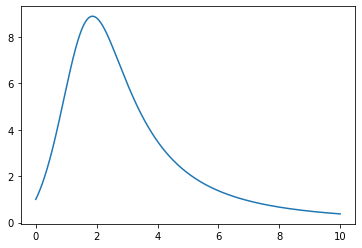

In [24]:
plt.plot(np.linspace(0.,10.,1000),SFR(np.linspace(0.,10.,1000)))

In [25]:
injection_parameters = dict(
    mass_1=1.4, mass_2=1.4, chi_1=0., chi_2=0., luminosity_distance=3000.,
    theta_jn=0., psi=0., phase=0., geocent_time=1126259642.413,
    ra=10., dec=20., lambda_1=500., lambda_2=500.)

duration = 10*64. # maximum duration of 90 min for 3G from https://arxiv.org/abs/2103.12274; 10 min should be ok for most signals though
sampling_frequency = 2 * 1024
start_time = injection_parameters['geocent_time'] + 2 - duration

waveform_arguments = dict(waveform_approximant='IMRPhenomPv2_NRTidal', # note: this waveform assumes aligned spins
                          reference_frequency=50., minimum_frequency=10.0) # setting this to be lower than f_min for all of the interferometers
waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_binary_neutron_star,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_neutron_star_parameters,
    waveform_arguments=waveform_arguments)

interferometers = bilby.gw.detector.InterferometerList(['CE', 'L1', 'ET'])
interferometers[1].power_spectral_density = bilby.gw.detector.PowerSpectralDensity(psd_file='/home/philippe.landry/.local/lib/python3.7/site-packages/bilby/gw/detector/noise_curves/CE_psd.txt') # two CEs at HL sites, ET at V site
interferometers.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration, start_time=start_time)

injection_polarizations = waveform_generator.frequency_domain_strain(injection_parameters)
signal_ifos = [interferometer.get_detector_response(injection_polarizations, injection_parameters) for interferometer in interferometers]

network_snr = np.sqrt(np.sum([interferometer.optimal_snr_squared(signal=signal_ifo) for interferometer,signal_ifo in zip(interferometers,signal_ifos)])).real

print(network_snr)

12:42 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_neutron_star
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_neutron_star_parameters


32.24033638318363


In [26]:
Distance(3000.,unit=u.Mpc).compute_z(cosmology=cosmo)

0.5116516836358173

In [27]:
Distance(100000.,unit=u.Mpc).compute_z(cosmology=cosmo)

9.488994163887563

In [28]:
# these astrophysical merger rates should track detection rates pretty closely, since detector horizons are designed to capture 1.4-1.4 mergers above SNR 12